<a href="https://colab.research.google.com/github/aditya26droid/Diabetes-Prediction-Model/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
col_names = ['preg', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedi', 'age', 'class']
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/pima-indians-diabetes.csv", names=col_names)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   preg     768 non-null    int64  
 1   glucose  768 non-null    int64  
 2   bp       768 non-null    int64  
 3   skin     768 non-null    int64  
 4   insulin  768 non-null    int64  
 5   bmi      768 non-null    float64
 6   pedi     768 non-null    float64
 7   age      768 non-null    int64  
 8   class    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head(2)

,preg,glucose,bp,skin,insulin,bmi,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [5]:
data.describe()

,preg,glucose,bp,skin,insulin,bmi,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can clearly see it is not data imbalance case so we dont have to synthesise our data we can directly proceed with further steps

<Axes: >

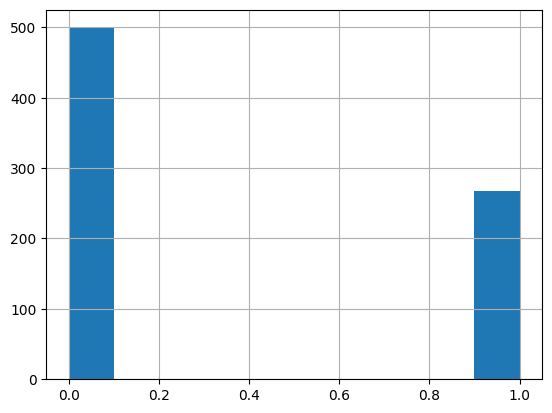

In [6]:
data["class"].hist(bins=10, align='mid' )


We used whisker and box plot to visualize outliers so that we can get rid of them and train our data with cleaned data so our prediction can be more accurate

<Axes: >

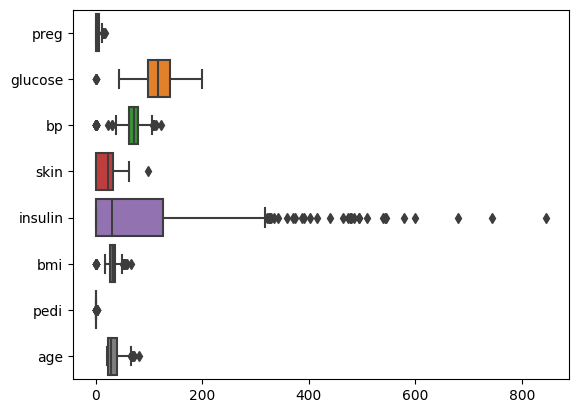

In [7]:
sn.boxplot(data=data.drop("class",axis=1),orient='h')

We will use pairplot method for analyzing the data distribution and their frequency so that we can choose our opertions wisely

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'bp'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

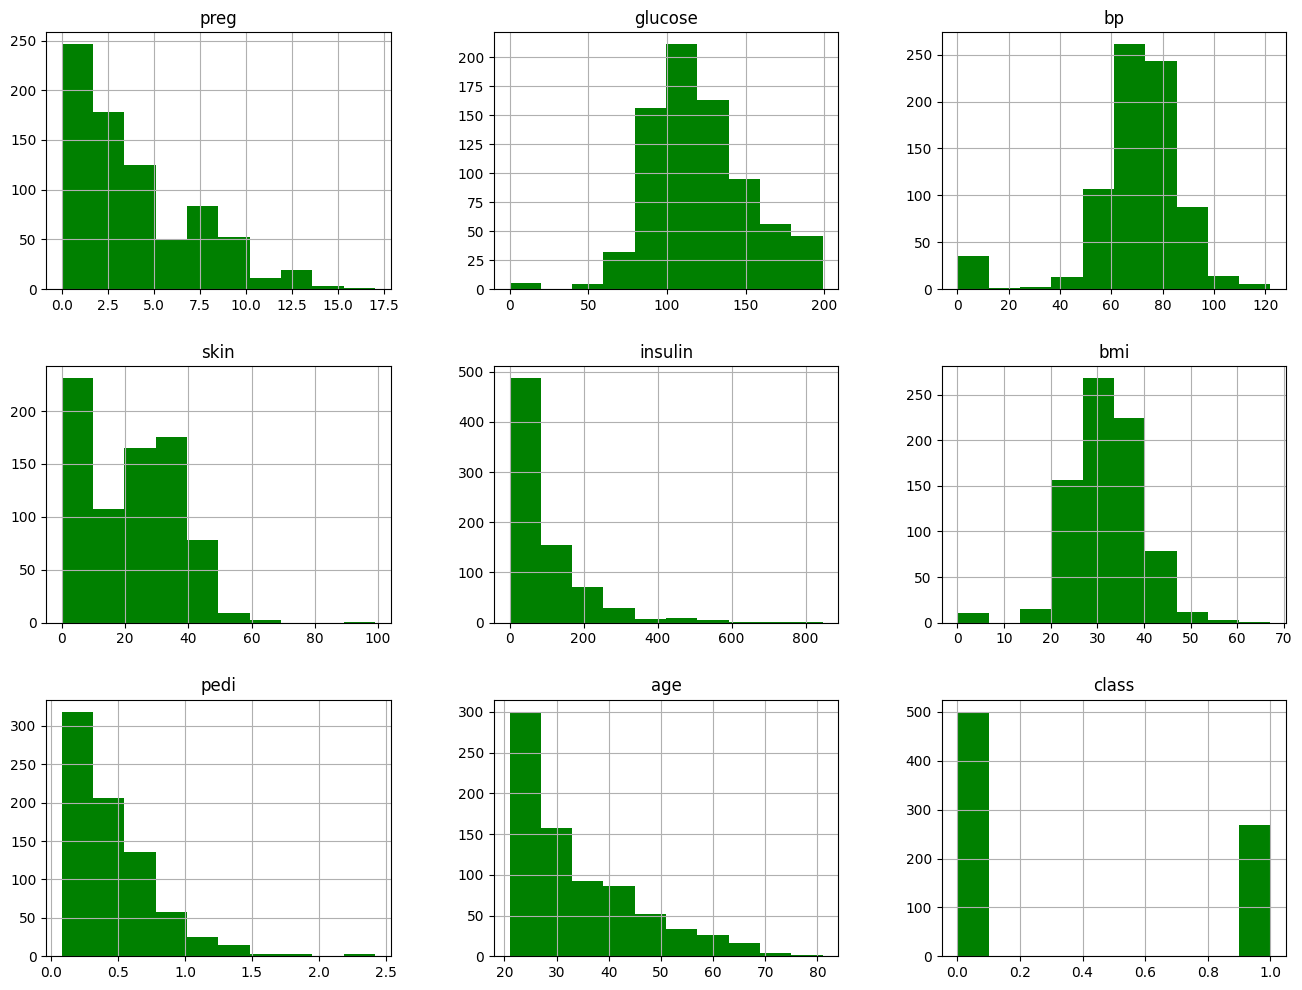

In [8]:
data.hist(bins=10,figsize=(16,12),color='green')

Correlation Matrix is made to vizualize our correlation between different attributes so we can make initial assumptions which attribute is important and which are not


<Axes: >

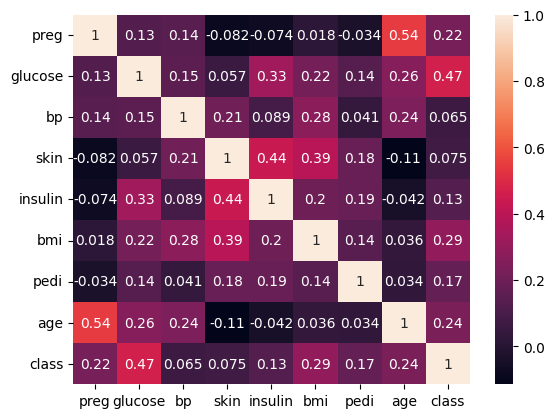

In [9]:
corr=data.corr()
sn.heatmap(corr,annot=True)

We watched that there is strong correlation between age and pregnancy so we plot a scatter plot out of that we can clearly see that majority is between the age of 20-40 and counts decrease with increase in age not a linear relation

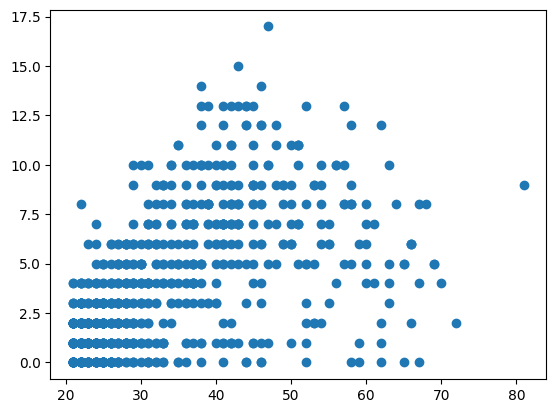

In [10]:
plt.scatter(data["age"],data["preg"])

We can see that majority of people in the data given to us are having BP in normal range but also we saw few data points are at 0 this means our data have false value too so we have to impute them with either mean or median that can be decided on the basis of senstivity of our attribute so in our case we can see our data contain false values so it is wise to use median here

Text(0.5, 1.0, 'Relation between Age and BP')

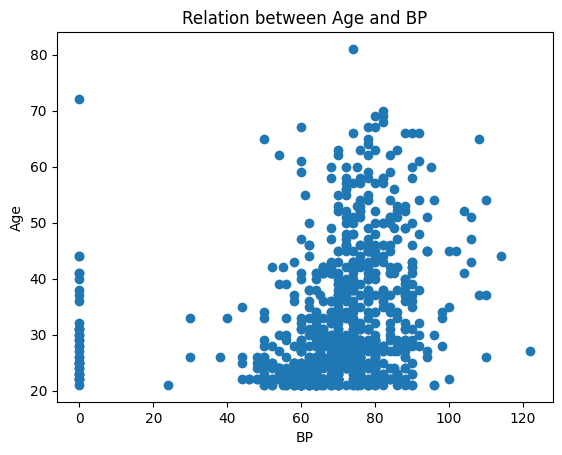

In [11]:
plt.scatter(data["bp"],data["age"])
plt.xlabel("BP")
plt.ylabel("Age")
plt.title("Relation between Age and BP")

In [12]:
x=data.drop("class",axis=1)
y=data["class"]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [14]:
from sklearn.ensemble import RandomForestClassifier
cfr=RandomForestClassifier(n_estimators=10000, random_state=100, n_jobs=-1)
cfr.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10000, n_jobs=-1, random_state=100)

<Axes: >

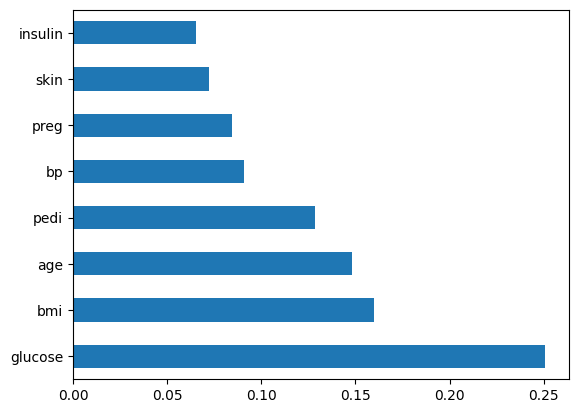

In [15]:
feature_importance=pd.Series(cfr.feature_importances_,index=x_train.columns)
feature_importance.nlargest(8).plot(kind='barh')

In [16]:
from sklearn.feature_selection import SelectFromModel
rf_sfm = SelectFromModel(cfr, threshold=0.13)
rf_sfm = rf_sfm.fit(x_train, y_train)

In [17]:
X_important_train = rf_sfm.transform(x_train)
X_important_test = rf_sfm.transform(x_test)

In [18]:
clf_important = RandomForestClassifier(n_estimators=10000, random_state=100, n_jobs=-1)
clf_important = clf_important.fit(X_important_train, y_train)

Hyper Parameter Tuning


In [23]:
from sklearn.model_selection import RandomizedSearchCV
parameters={
    'n_estimators': [2000, 5000,10000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
clf=RandomizedSearchCV(clf_important,parameters,random_state=0)
search=clf.fit(X_important_train,y_train)
search.best_params_

{'n_estimators': 2000,
 'max_features': 'log2',
 'max_depth': 7,
 'criterion': 'entropy'}

In [24]:
clf_important = RandomForestClassifier(random_state=100, max_features='log2', n_estimators= 2000, max_depth=1, criterion='entropy', n_jobs=-1)
clf_important = clf_important.fit(X_important_train, y_train)

In [25]:
from sklearn.metrics import f1_score,accuracy_score

In [26]:
y_pred = cfr.predict(x_test)
rf_ac = accuracy_score(y_test, y_pred)
rf_fscore = f1_score(y_test ,y_pred)

print("Baseline Model Accuracy:", rf_ac)
print("Baseline Model F1 Score:", rf_fscore)

Baseline Model Accuracy: 0.7489177489177489
Baseline Model F1 Score: 0.6329113924050633


In [27]:
y_important_pred = clf_important.predict(X_important_test)

rf_imp_ac = accuracy_score(y_test, y_important_pred)
rf_imp_fscore = f1_score(y_test, y_important_pred)

print("Limited Features Model Accuracy:", rf_imp_ac)
print("Limited Features Model F1 Score:", rf_imp_fscore)

Limited Features Model Accuracy: 0.7056277056277056
Limited Features Model F1 Score: 0.3461538461538461
